## Analise de crédito
### Nome: Gabriel Nunes Henke
#### 03/03/2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

### Contruindo um array de tuplas com os modelos de classificação

In [2]:
models = [
    ("RF", RandomForestClassifier()),
    ("DT", DecisionTreeClassifier()),
    ("LR", LogisticRegression()),
    ("Gaussian", GaussianNB()),
    ("KNC", KNeighborsClassifier()),
    ("SVC", SVC())
]

### Carregando dataset

In [3]:
df = pd.read_csv('credit-data.csv')
df

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[2000 rows x 5 columns]

### Substituindo valores negativos da idade pela media das idades

In [12]:
df.loc[df['age'] < 0, ['age']] = df['age'][df.age > 0].mean()
df.loc[df['age'] < 0, ['age']]

Empty DataFrame
Columns: [age]
Index: []

In [13]:
df.isna().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

### Substituindo os valores NaN pela media

In [14]:
imp = SimpleImputer(missing_values = np.nan, strategy = "mean" )
df["age"] = imp.fit_transform(df[["age"]])

In [15]:
df.isna().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

### Separando os as features da classe (X e y)

In [16]:
X = df.drop(['clientid', 'default'], axis = 1).values
y = df[['default']].values

### Dividindo dataset de treino e de teste

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

### Treinando varios modelos e comparando a acuracia e Matriz de confusão

In [41]:
trained_models = []
for name, model in models:
    print('\n------------- ' + str(name)+ ' -------------')
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    
#     disp = metrics.plot_confusion_matrix(model, X_test, y_test, labels=[1, 0])
    print(metrics.confusion_matrix(y_test, y_pred, labels = [1, 0]))
    disp.ax_.set_title(name)

#     print("ROC", metrics.roc_curve(y_test, y_pred))
    print("Acuracia: ", metrics.accuracy_score(y_test, y_pred))
    trained_models.append((name, model, metrics.accuracy_score(y_test, y_pred)))


------------- RF -------------
[[ 69   7]
 [  1 523]]
Acuracia:  0.9866666666666667

------------- DT -------------
[[ 73   3]
 [  5 519]]
Acuracia:  0.9866666666666667

------------- LR -------------
[[ 41  35]
 [  8 516]]
Acuracia:  0.9283333333333333

------------- Gaussian -------------
[[ 46  30]
 [  9 515]]
Acuracia:  0.935

------------- KNC -------------
[[ 24  52]
 [ 41 483]]
Acuracia:  0.845

------------- SVC -------------
[[  0  76]
 [  0 524]]
Acuracia:  0.8733333333333333


### Selecionando o melhor modelo de todos

In [42]:
trained_models

[('RF', RandomForestClassifier(), 0.9866666666666667),
 ('DT', DecisionTreeClassifier(), 0.9866666666666667),
 ('LR', LogisticRegression(), 0.9283333333333333),
 ('Gaussian', GaussianNB(), 0.935),
 ('KNC', KNeighborsClassifier(), 0.845),
 ('SVC', SVC(), 0.8733333333333333)]

In [46]:
best_model = sorted(trained_models, key=lambda x: x[2], reverse=True)[0]
best_model

('RF', RandomForestClassifier(), 0.9866666666666667)

### Matriz de Confusao do melhor modelo

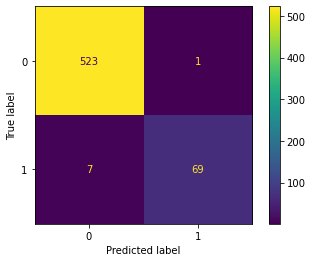

In [49]:
metrics.plot_confusion_matrix(best_model[1], X_test, y_test)  
plt.show()  

### ROC Curve do melhor modelo

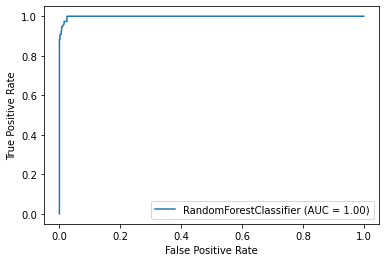

In [50]:
metrics.plot_roc_curve(best_model[1], X_test, y_test)  
plt.show()  

### Melhor modelo é o Randon Forest (Floresta aleatoria)
## 98.6% de Acurácia de precisao do modelo de classificação